In [1]:
import sys, os
sys.path.insert(0, '../..')
# os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')
# matplotlib.rcParams['figure.figsize'] = (40, 20)

In [3]:
DATA_ROOT =  '../../../final_crosswalk/'

DATASETS = ('airport/', 'polblog/', 'polbook/', 'pokec/', ) # small_pokec
METRICS = ('roc_score', 'sp_score', )# 'gini_score')
def lighten_color(color, amount=0.2):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def get_color(name):
    if 'GAT' in name:
        return 'red'
    if 'GCN' in name:
        return 'orange'
    return 'blue'

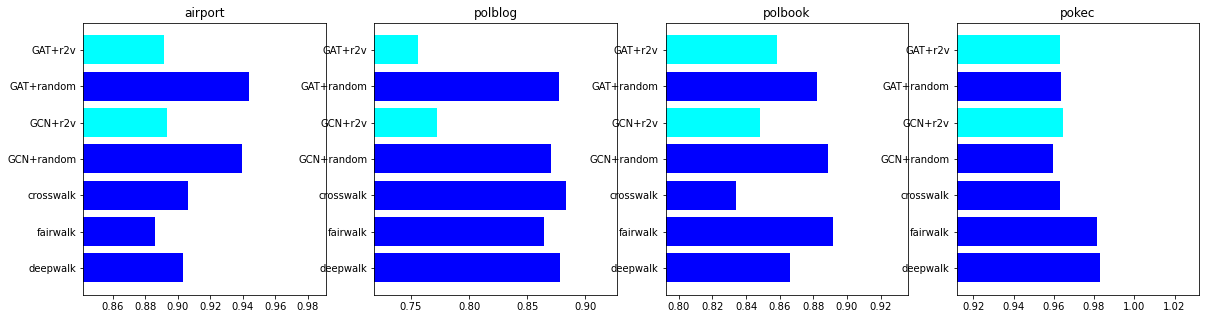

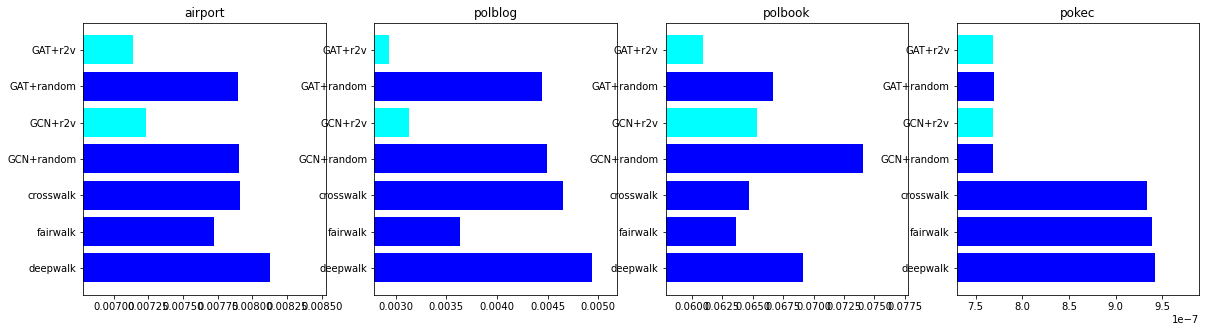

In [4]:
for metric in METRICS:
    n_datasets = len(DATASETS)
        
    f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
#     f.suptitle("mean " + metric + ' (DEEPWALK)')
    for idx, dataset in enumerate(DATASETS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        m_dict = pkl.load(open(file, 'rb'))
        
        for m in list(m_dict.keys()):
        
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+deepwalk' in m.lower():
                m_dict[m.replace('+deepwalk', '')] = m_dict.pop(m)
        y = np.mean(np.vstack(m_dict.values()), axis=1)
        axes[idx].barh(list(m_dict.keys()), y, color=['cyan' if 'r2v' in x else 'blue' for x in m_dict.keys() ])
        axes[idx].title.set_text(dataset.replace('/', ''))
        # axes[idx].set_xticklabels(list(m_dict.keys()), rotation=90)
        p10, P10 = np.min(y) * .95, np.max(y) * 1.05
        axes[idx].set_xlim([p10, P10])
#         axes[idx].get_xticklabels()[0].set_visible(False)
        
    plt.plot()

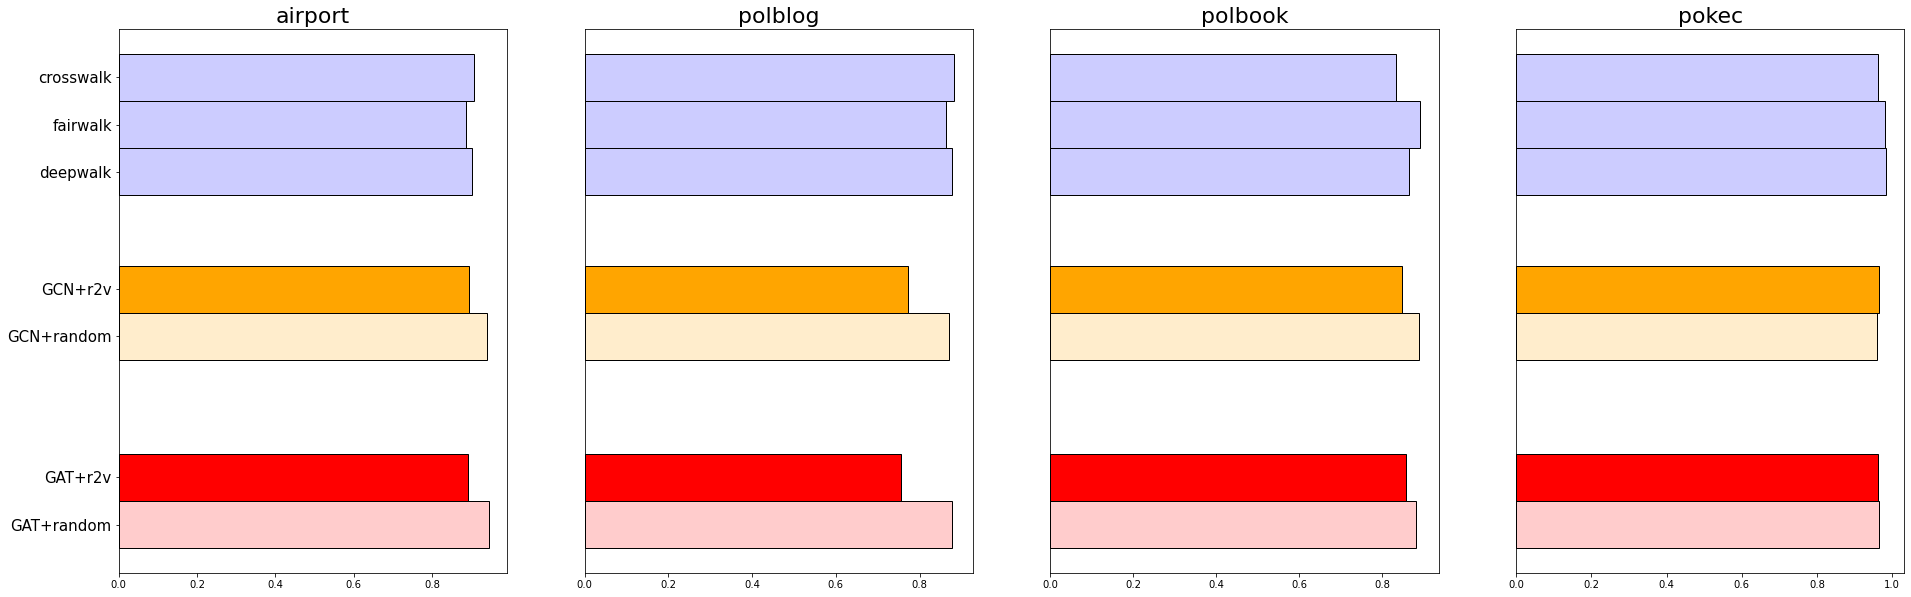

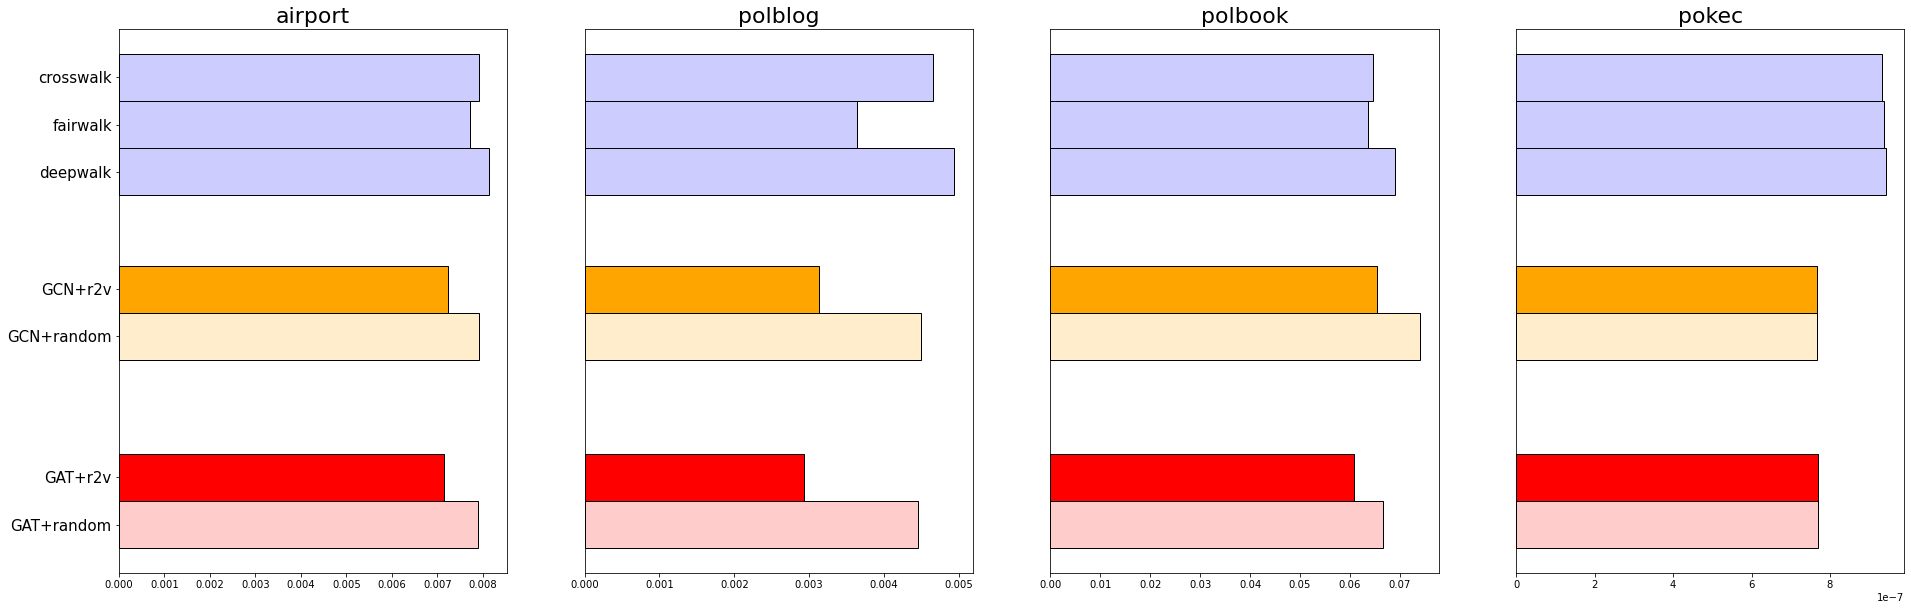

In [5]:
for metric in METRICS:
    n_datasets = len(DATASETS)
        
    f, axes = plt.subplots(1, n_datasets, figsize=(32, 10) )
#     f.suptitle("mean " + metric + ' (DEEPWALK)')
    for idx, dataset in enumerate(DATASETS):
        order = ['GAT+random', 'GAT+r2v', 'GCN+random', 'GCN+r2v']
        file = DATA_ROOT + dataset + metric + '.pkl'
        m_dict = pkl.load(open(file, 'rb'))
        
        for m in list(m_dict.keys()):
        
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+deepwalk' in m.lower():
                m_dict[m.replace('+deepwalk', '')] = m_dict.pop(m)
        y = np.mean(np.vstack(m_dict.values()), axis=1)
#         print(y.shape, m_dict.keys())
#         print(y.shape, len(m_dict))
        width = 0.25
        
        plots = [z for z in m_dict]
        y_ = [y[id] for id,z in enumerate(m_dict)]
        
        x = np.array([1.75, 2, 2.25, .875, 1.125, -.125, 0.125])
        A = axes[idx].barh(x, y_, width, color=[lighten_color(get_color(x)) if not 'r2v' in x else get_color(x) for x  in plots], label=plots, edgecolor='black')
        
#         print(plots)

        axes[idx].set_yticks(x)
        axes[idx].set_yticklabels(plots,fontsize=15)
#         axes[idx].yticks(fontsize=22)
        if idx != 0:
            # disable y ticks
            axes[idx].set_yticks([])
        axes[idx].set_title(dataset.replace('/', ''), fontsize=22)
    
    plt.plot()

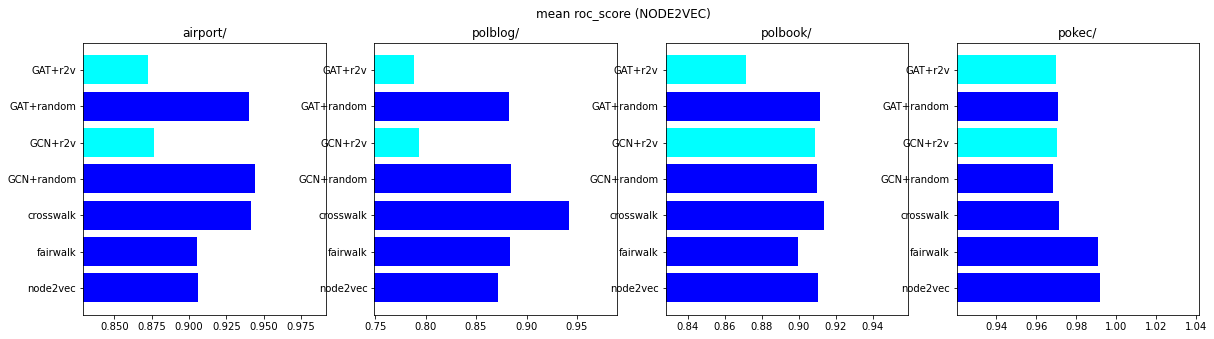

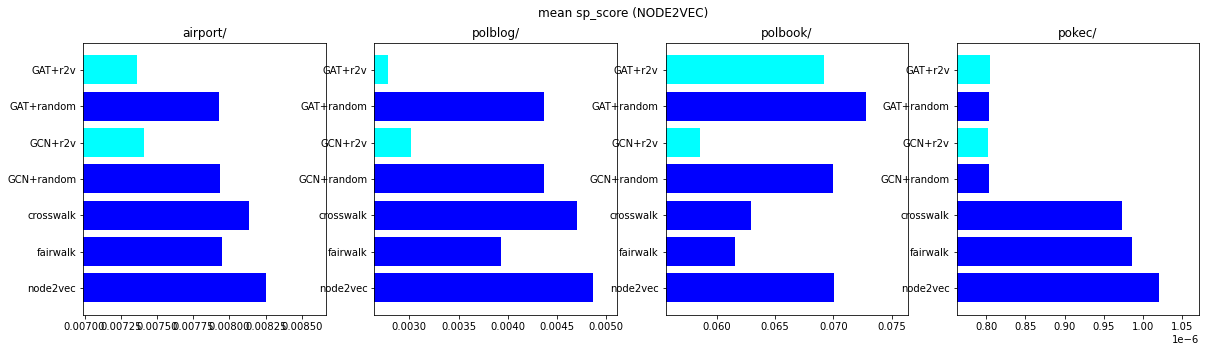

In [6]:
for metric in METRICS:
    n_datasets = len(DATASETS)
        
    f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
    f.suptitle("mean " + metric + ' (NODE2VEC)')
    for idx, dataset in enumerate(DATASETS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        m_dict = pkl.load(open(file, 'rb'))
        
        for m in list(m_dict.keys()):
        
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+node2vec' in m.lower():
                m_dict[m.replace('+node2vec', '')] = m_dict.pop(m)
        y = np.mean(np.vstack(m_dict.values()), axis=1)
        axes[idx].barh(list(m_dict.keys()), y, color=['cyan' if 'r2v' in x else 'blue' for x in m_dict.keys() ])
        axes[idx].title.set_text(dataset)
        # axes[idx].set_xticklabels(list(m_dict.keys()), rotation=90)
        p10, P10 = np.min(y) * .95, np.max(y) * 1.05
        axes[idx].set_xlim([p10, P10])
        
    plt.plot()

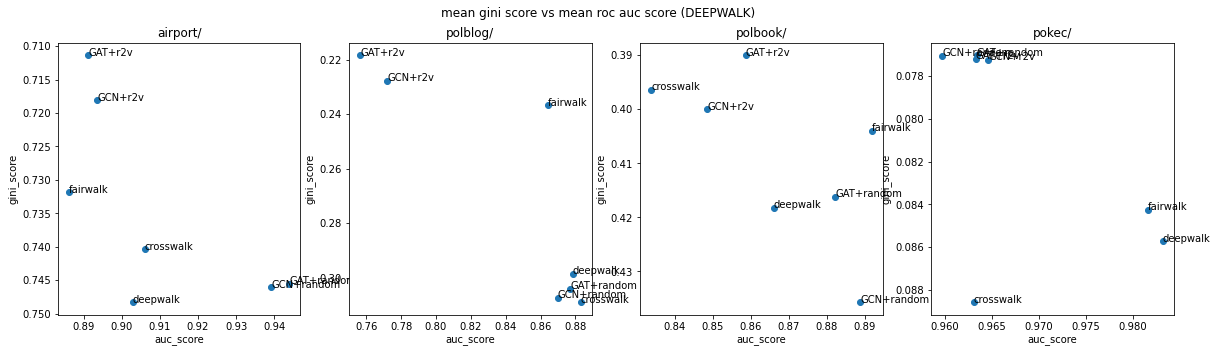

In [7]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean gini score vs mean roc auc score (DEEPWALK)")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    gini_file = DATA_ROOT + dataset + 'gini_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='gini_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    gini = pkl.load(open(gini_file, 'rb'))
    for m in list(roc.keys()):
        if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
            roc.pop(m)
        if '+deepwalk' in m.lower():
            roc[m.replace('+deepwalk', '')] = roc.pop(m)
    for m in list(gini.keys()):
        if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
            gini.pop(m)
        if '+deepwalk' in m.lower():
            gini[m.replace('+deepwalk', '')] = gini.pop(m)
    
    combined = {k: (np.mean(roc[k]), np.mean(gini[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


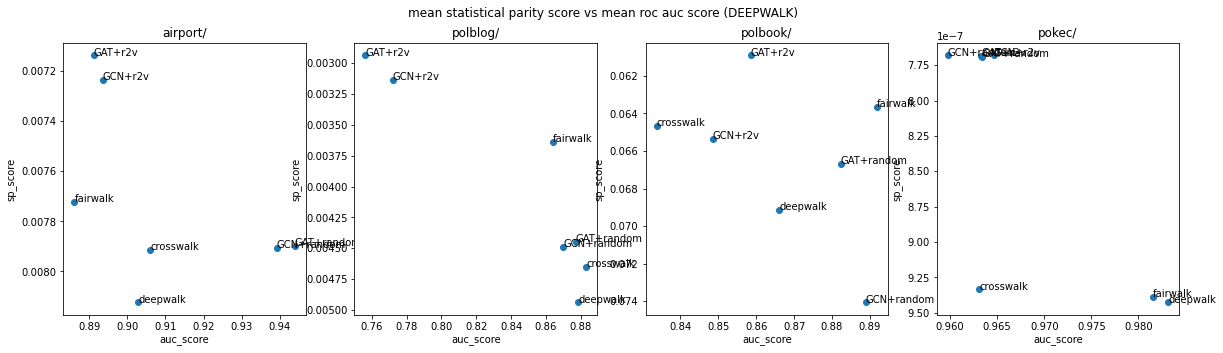

In [8]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean statistical parity score vs mean roc auc score (DEEPWALK)")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    sp_file = DATA_ROOT + dataset + 'sp_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='sp_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    sp = pkl.load(open(sp_file, 'rb'))
    for m in list(roc.keys()):
        if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
            roc.pop(m)
        if '+deepwalk' in m.lower():
            roc[m.replace('+deepwalk', '')] = roc.pop(m)
    for m in list(sp.keys()):
        if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
            sp.pop(m)
        if '+deepwalk' in m.lower():
            sp[m.replace('+deepwalk', '')] = sp.pop(m)
    combined = {k: (np.mean(roc[k]), np.mean(sp[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


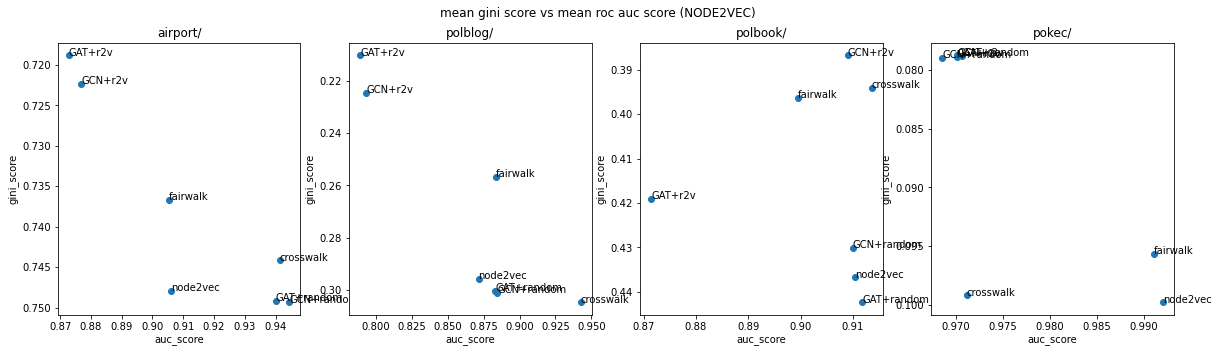

In [9]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean gini score vs mean roc auc score (NODE2VEC)")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    gini_file = DATA_ROOT + dataset + 'gini_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='gini_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    gini = pkl.load(open(gini_file, 'rb'))
    for m in list(roc.keys()):
        if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
            roc.pop(m)
        if '+node2vec' in m.lower():
            roc[m.replace('+node2vec', '')] = roc.pop(m)
    for m in list(gini.keys()):
        if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
            gini.pop(m)
        if '+node2vec' in m.lower():
            gini[m.replace('+node2vec', '')] = gini.pop(m)
    
    combined = {k: (np.mean(roc[k]), np.mean(gini[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


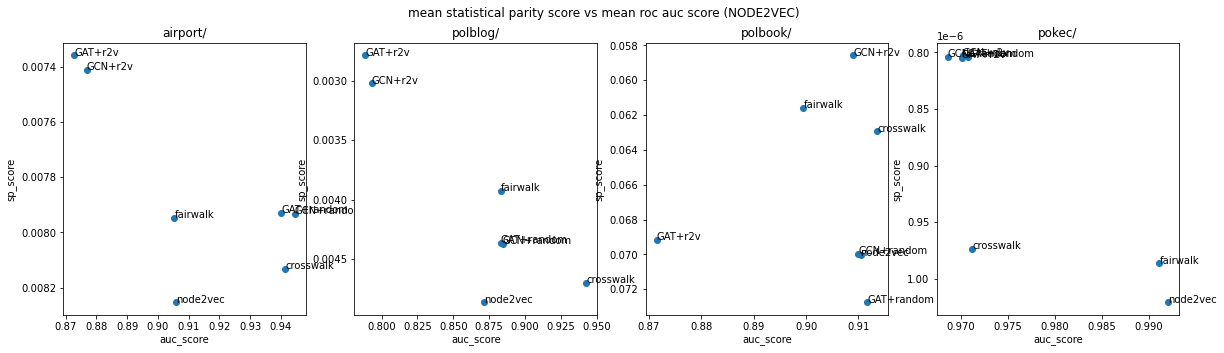

In [10]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean statistical parity score vs mean roc auc score (NODE2VEC)")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    sp_file = DATA_ROOT + dataset + 'sp_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='sp_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    sp = pkl.load(open(sp_file, 'rb'))
    for m in list(roc.keys()):
        if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
            roc.pop(m)
        if '+node2vec' in m.lower():
            roc[m.replace('+node2vec', '')] = roc.pop(m)
    for m in list(sp.keys()):
        if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
            sp.pop(m)
        if '+node2vec' in m.lower():
            sp[m.replace('+node2vec', '')] = sp.pop(m)
    combined = {k: (np.mean(roc[k]), np.mean(sp[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


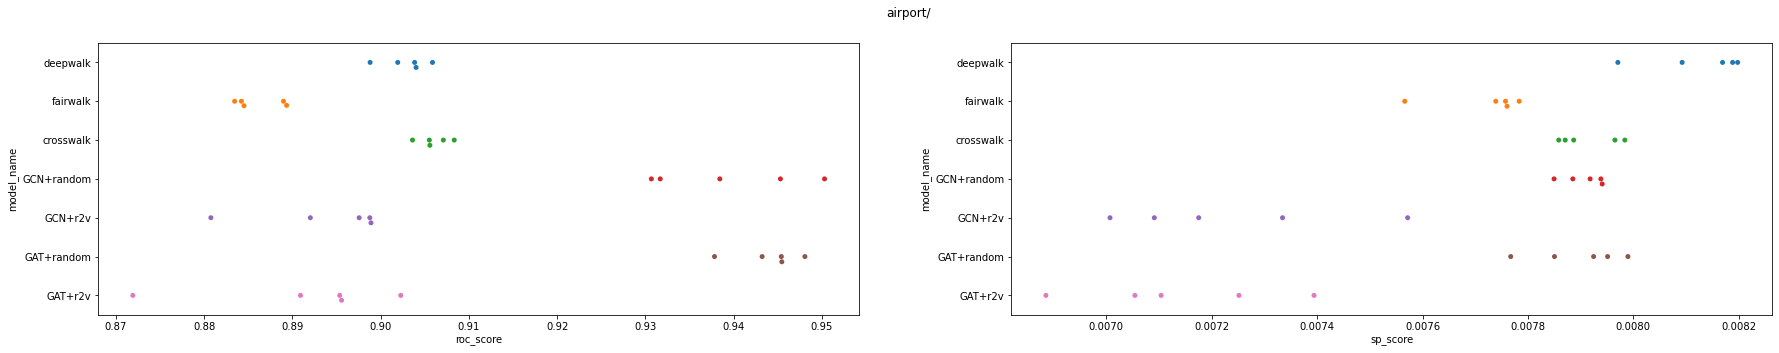

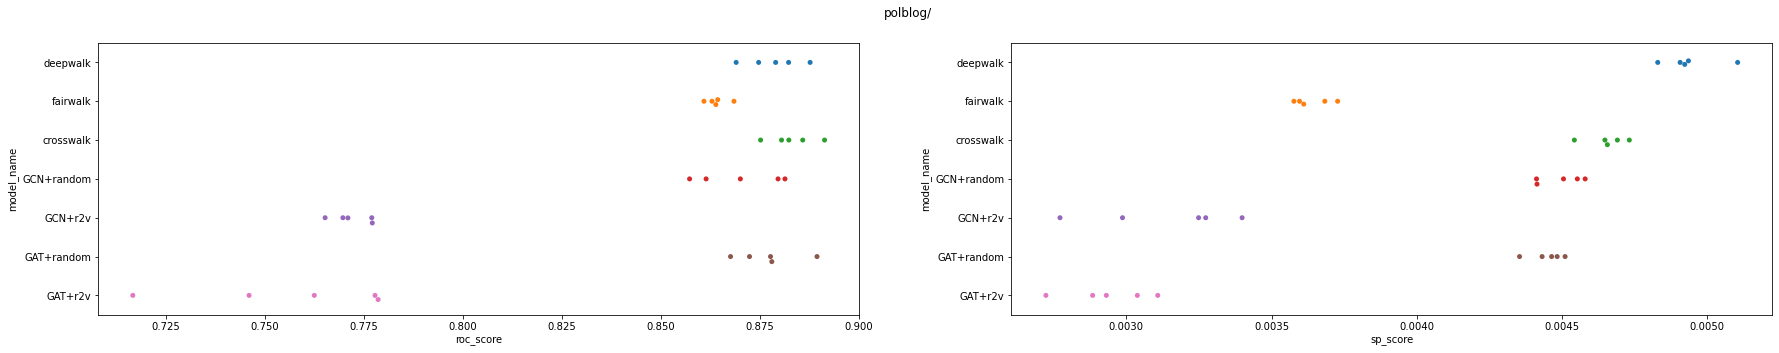

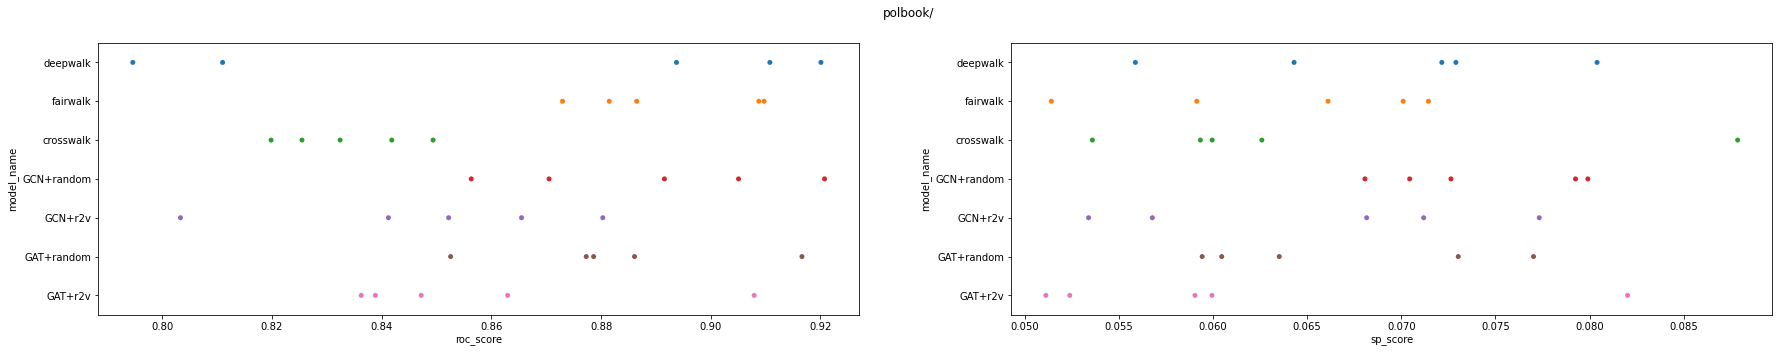

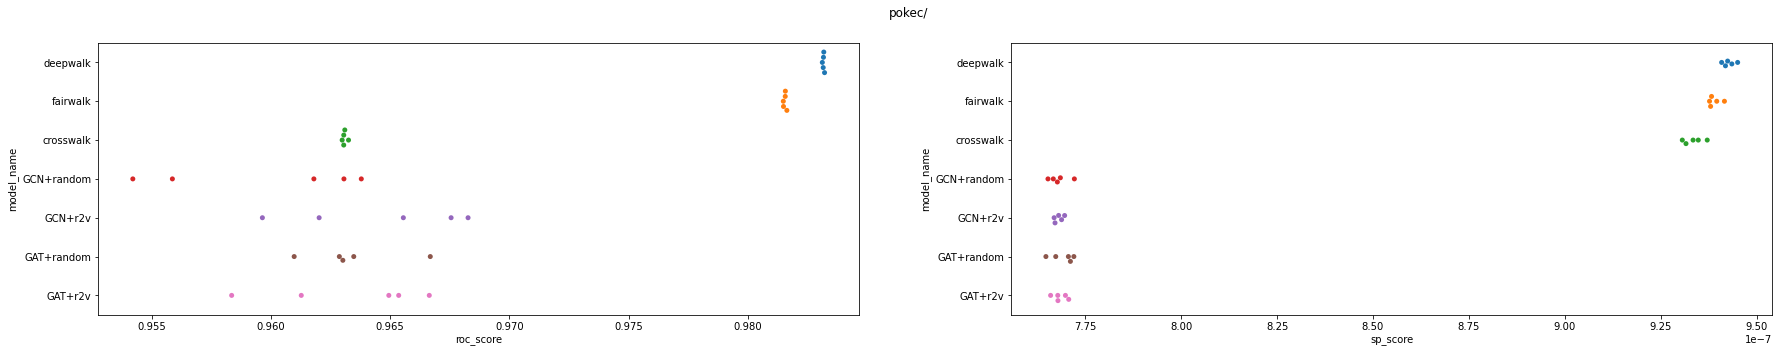

In [11]:
# swarm plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+deepwalk' in m.lower():
                m_dict[m.replace('+deepwalk', '')] = m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.swarmplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name', legend=False)
    plt.show()

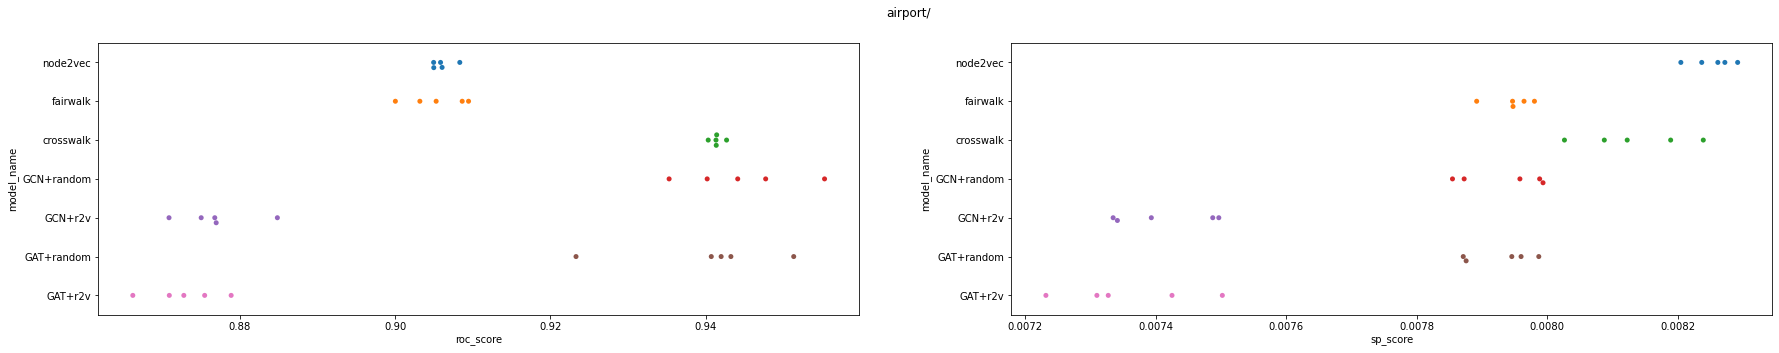

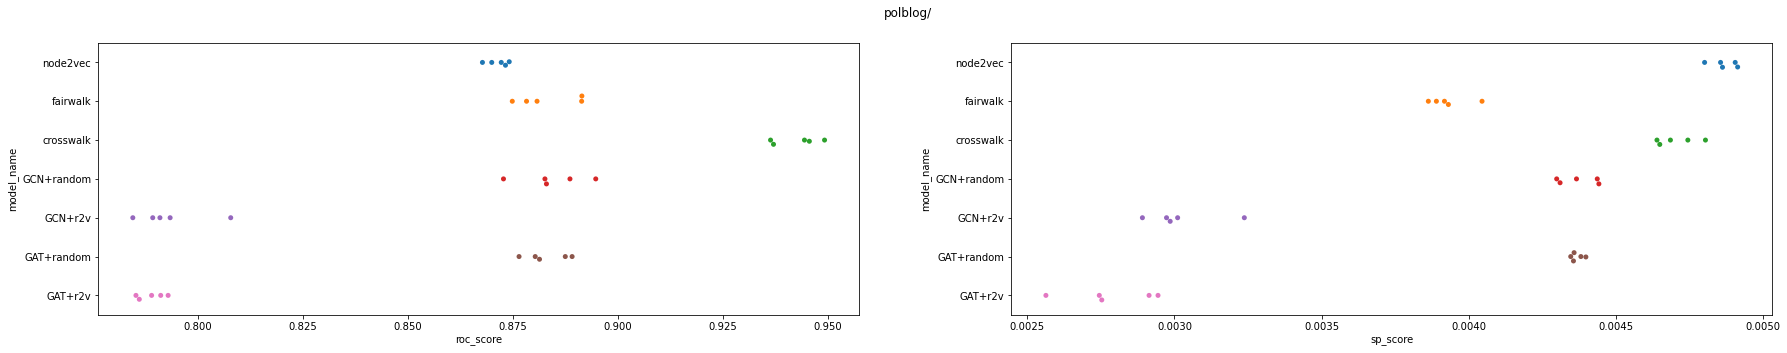

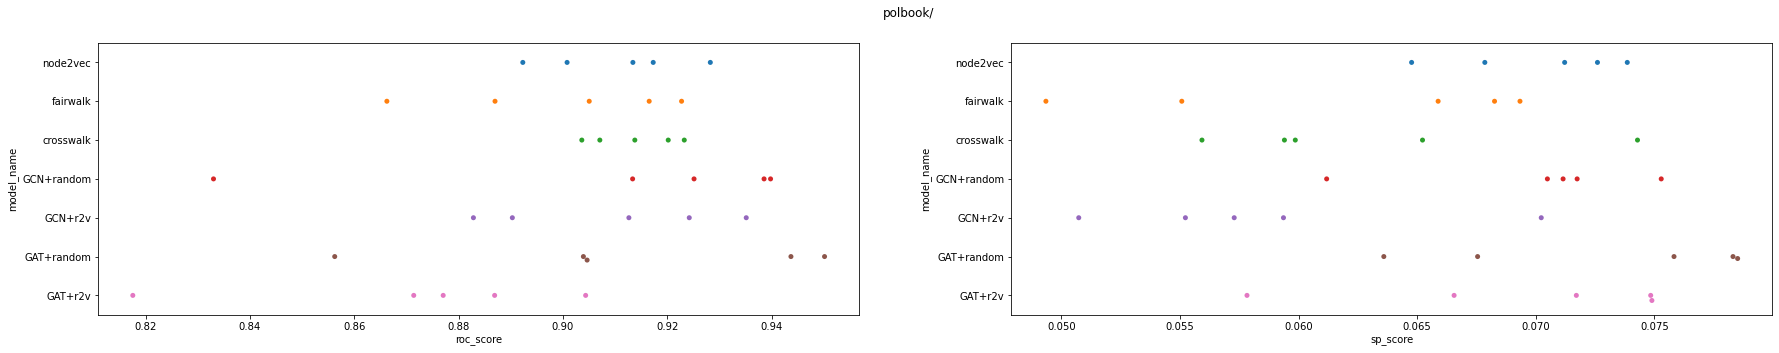

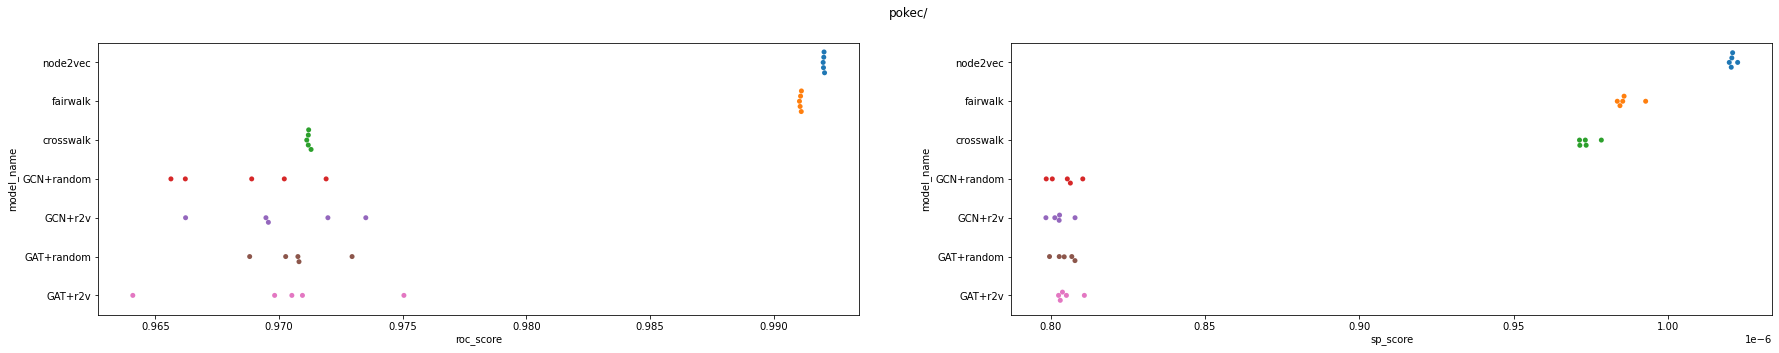

In [12]:
# swarm plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+node2vec' in m.lower():
                m_dict[m.replace('+node2vec', '')] = m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.swarmplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name', legend=False)
    plt.show()

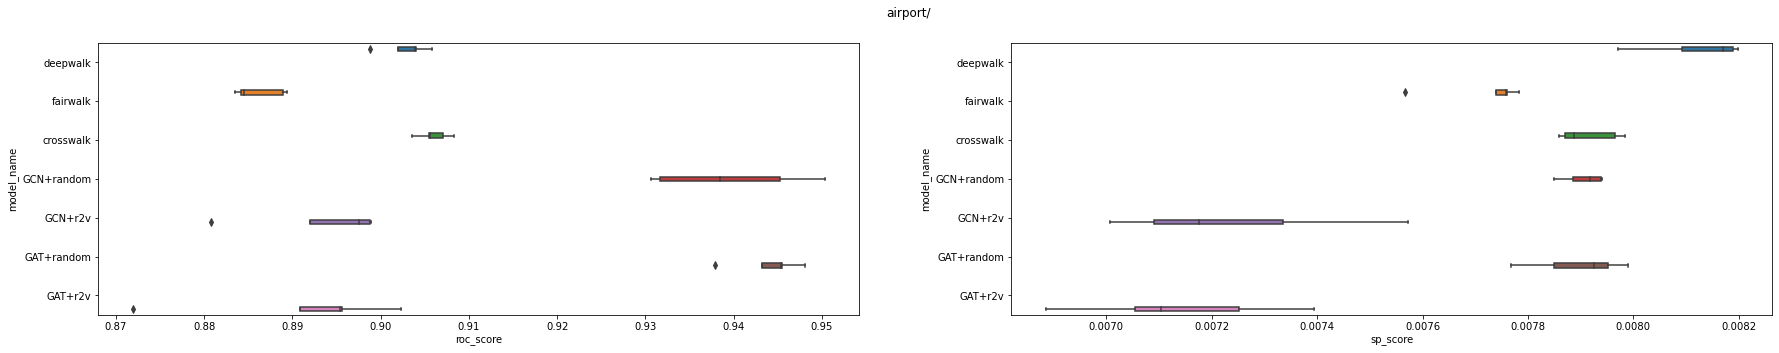

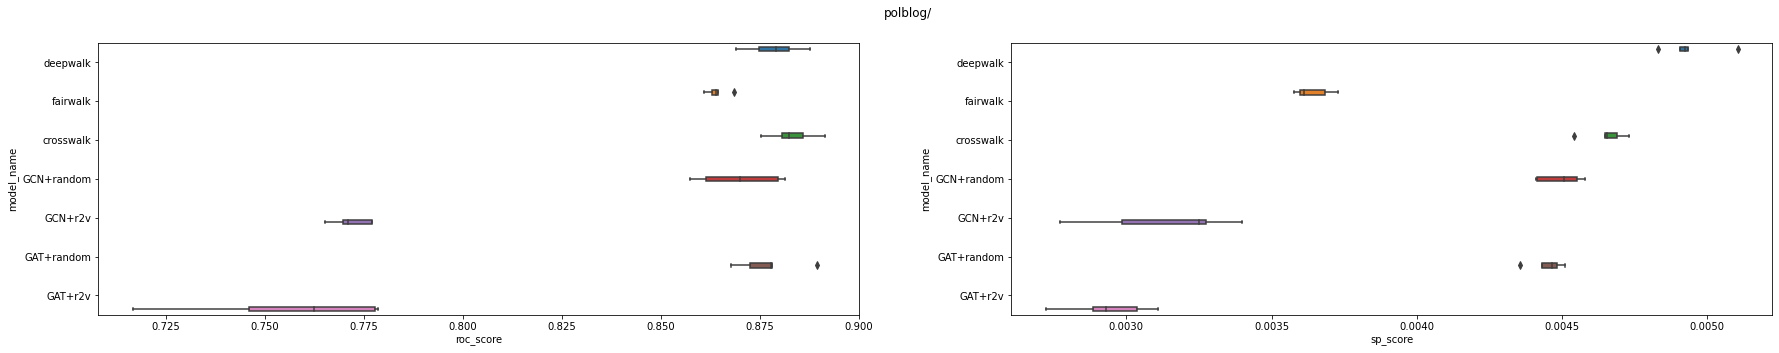

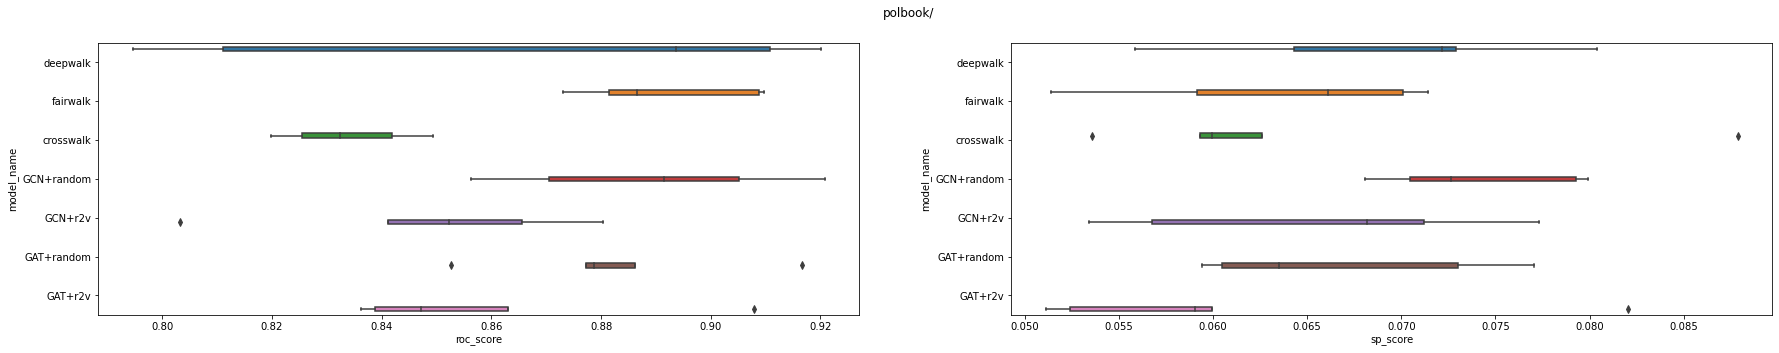

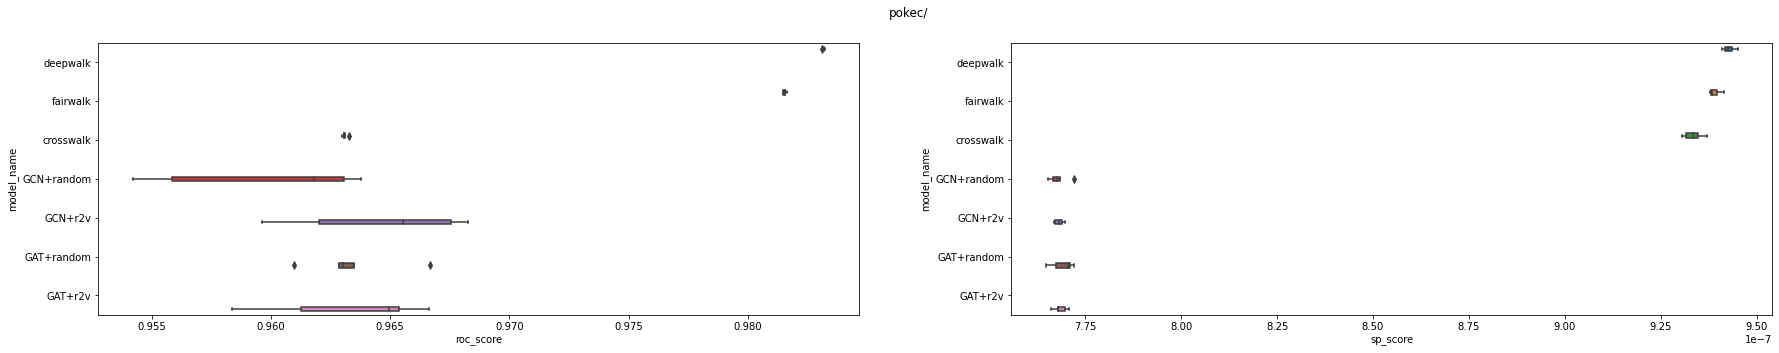

In [13]:
# box plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'node2vec']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+deepwalk' in m.lower():
                m_dict[m.replace('+deepwalk', '')] = m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.boxplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name',)
        axes[idx].get_legend().remove()
    plt.show()

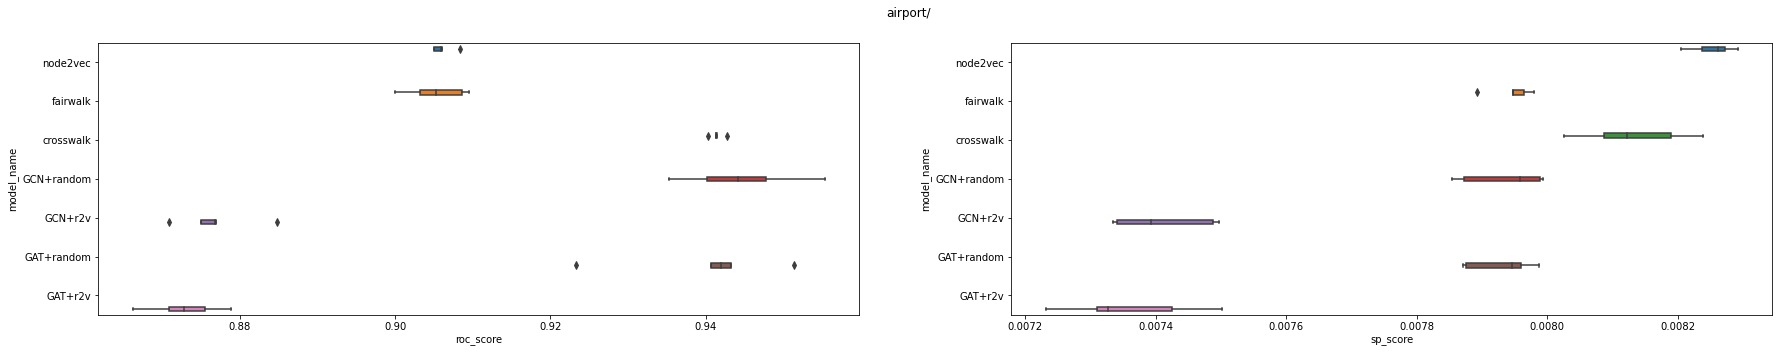

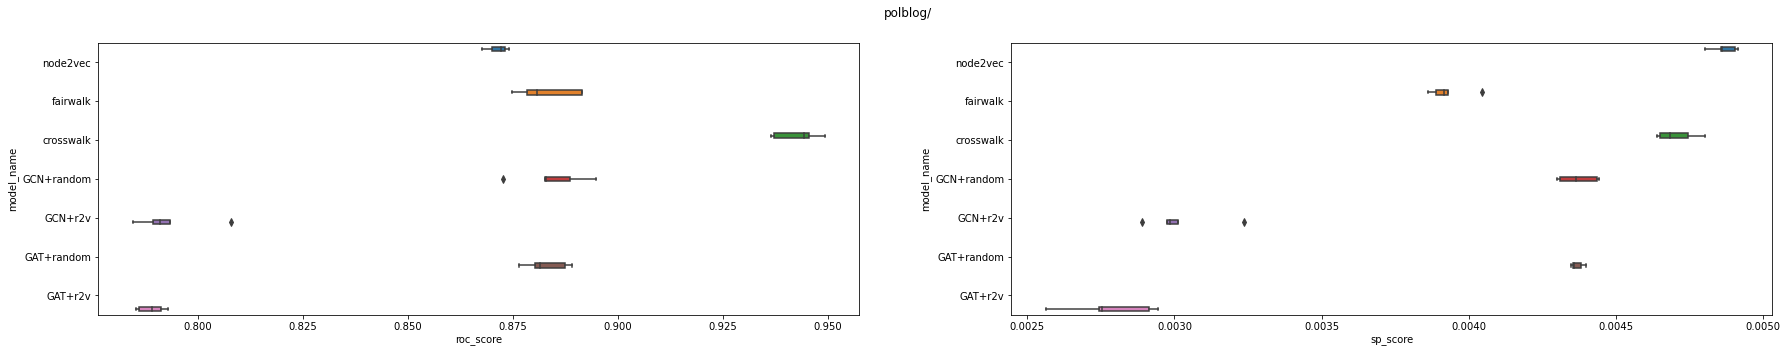

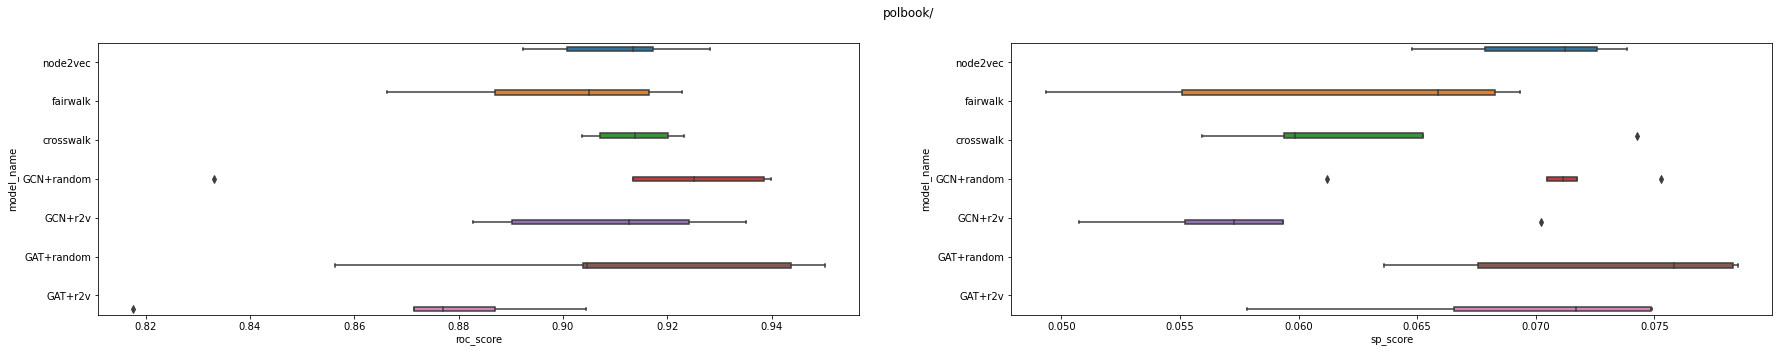

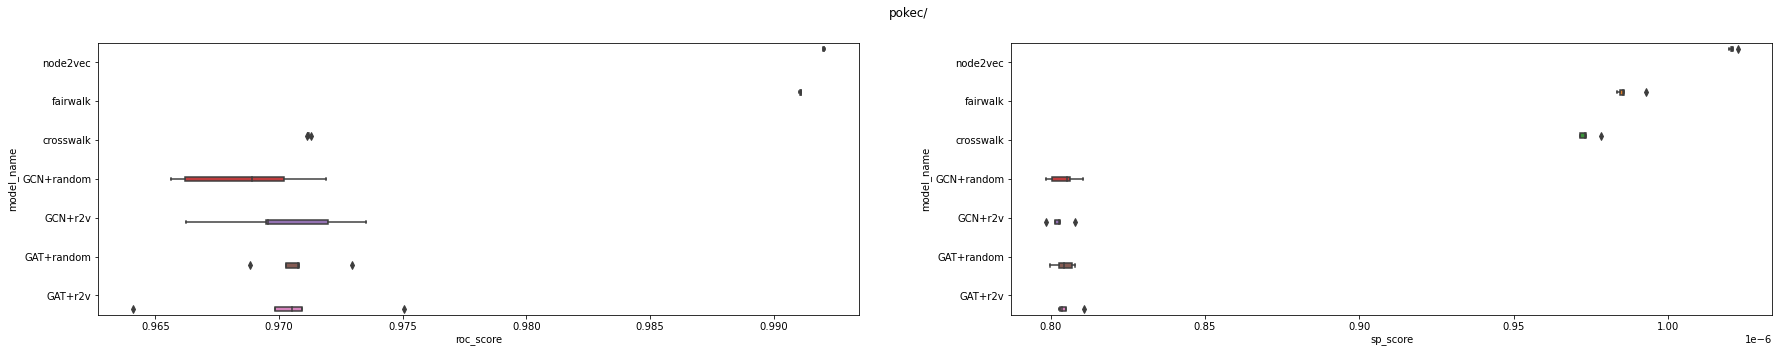

In [14]:
# box plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            
            # removing node2vec and word2vec
            if any([model in m.lower() for model in ['word2vec', 'deepwalk']]):
                m_dict.pop(m)
            # remove deepwalk from name
            if '+node2vec' in m.lower():
                m_dict[m.replace('+node2vec', '')] = m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.boxplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name',)
        axes[idx].get_legend().remove()
    plt.show()

# investigating node2vec embeddings for small pokec

## 

In [15]:
# ## crosswalk embeddings
# cross_embs = np.load('../../../final_results/airport/data_one/airport_crosswalk_node2vec.npy')
# embs = np.load('../../../final_results/airport/data_one/airport_node2vec.npy')
# cross_embs.shape, embs.shape

In [16]:
# from utils import snakemake_utils
# d = snakemake_utils.get_dataset("airport").get_grouped_col()

In [17]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# pcr = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
# x = pcr.fit_transform(cross_embs, d.numpy())
# x.shape

In [18]:
# sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=d.numpy(), palette="tab10")